# **Computational Drug Discovery - Second Notebook - Exploratory Data Analysis**



## **Load bioactivity data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('enoyl_acyl_carrier_protein_reductase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,10660.0,inactive
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
...,...,...,...,...
335,CHEMBL4794589,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Br)cc1,15600.0,inactive
336,CHEMBL5190515,CCS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/...,30.0,active
337,CHEMBL5174930,CS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/O...,400.0,active
338,CHEMBL5284077,C=C1C(=O)OC[C@H]1C/C=C(\C)CC(=O)C=C(C)C,4.5,active


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL217926,10660.0,inactive,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1
1,CHEMBL216547,100000.0,inactive,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1
2,CHEMBL213720,100000.0,inactive,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1
3,CHEMBL217274,100000.0,inactive,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1
4,CHEMBL217773,100000.0,inactive,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1
...,...,...,...,...
335,CHEMBL4794589,15600.0,inactive,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Br)cc1
336,CHEMBL5190515,30.0,active,CCS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/...
337,CHEMBL5174930,400.0,active,CS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/O...
338,CHEMBL5284077,4.5,active,C=C1C(=O)OC[C@H]1C/C=C(\C)CC(=O)C=C(C)C


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,286.375,2.80630,1.0,2.0
1,365.271,3.56880,1.0,2.0
2,344.411,2.57750,1.0,4.0
3,314.429,3.42314,1.0,2.0
4,378.472,4.59860,1.0,3.0
...,...,...,...,...
335,366.240,3.84390,2.0,3.0
336,441.196,1.99250,2.0,7.0
337,427.169,1.60240,2.0,7.0
338,248.322,2.97740,0.0,3.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [9]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,286.375,2.80630,1.0,2.0
1,365.271,3.56880,1.0,2.0
2,344.411,2.57750,1.0,4.0
3,314.429,3.42314,1.0,2.0
4,378.472,4.59860,1.0,3.0
...,...,...,...,...
335,366.240,3.84390,2.0,3.0
336,441.196,1.99250,2.0,7.0
337,427.169,1.60240,2.0,7.0
338,248.322,2.97740,0.0,3.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,10660.0,inactive
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
...,...,...,...,...
335,CHEMBL4794589,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Br)cc1,15600.0,inactive
336,CHEMBL5190515,CCS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/...,30.0,active
337,CHEMBL5174930,CS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/O...,400.0,active
338,CHEMBL5284077,C=C1C(=O)OC[C@H]1C/C=C(\C)CC(=O)C=C(C)C,4.5,active


Now, let's combine the 2 DataFrame

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,10660.0,inactive,286.375,2.80630,1.0,2.0
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,365.271,3.56880,1.0,2.0
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,344.411,2.57750,1.0,4.0
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,314.429,3.42314,1.0,2.0
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,378.472,4.59860,1.0,3.0
...,...,...,...,...,...,...,...,...
335,CHEMBL4794589,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Br)cc1,15600.0,inactive,366.240,3.84390,2.0,3.0
336,CHEMBL5190515,CCS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/...,30.0,active,441.196,1.99250,2.0,7.0
337,CHEMBL5174930,CS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/O...,400.0,active,427.169,1.60240,2.0,7.0
338,CHEMBL5284077,C=C1C(=O)OC[C@H]1C/C=C(\C)CC(=O)C=C(C)C,4.5,active,248.322,2.97740,0.0,3.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [25]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [14]:
df_combined.standard_value.describe()

count    3.400000e+02
mean     3.145456e+05
std      5.422512e+06
min      2.000000e+00
25%      2.292500e+02
50%      4.495000e+03
75%      1.679250e+04
max      1.000000e+08
Name: standard_value, dtype: float64

In [15]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [21]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [22]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,inactive,286.375,2.80630,1.0,2.0,10660.0
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,inactive,365.271,3.56880,1.0,2.0,100000.0
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,inactive,344.411,2.57750,1.0,4.0,100000.0
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,inactive,314.429,3.42314,1.0,2.0,100000.0
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,inactive,378.472,4.59860,1.0,3.0,100000.0
...,...,...,...,...,...,...,...,...
335,CHEMBL4794589,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Br)cc1,inactive,366.240,3.84390,2.0,3.0,15600.0
336,CHEMBL5190515,CCS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/...,active,441.196,1.99250,2.0,7.0,30.0
337,CHEMBL5174930,CS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/O...,active,427.169,1.60240,2.0,7.0,400.0
338,CHEMBL5284077,C=C1C(=O)OC[C@H]1C/C=C(\C)CC(=O)C=C(C)C,active,248.322,2.97740,0.0,3.0,4.5


In [23]:
df_norm.standard_value_norm.describe()

count    3.400000e+02
mean     3.145456e+05
std      5.422512e+06
min      2.000000e+00
25%      2.292500e+02
50%      4.495000e+03
75%      1.679250e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [26]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,inactive,286.375,2.80630,1.0,2.0,4.972243
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,inactive,365.271,3.56880,1.0,2.0,4.000000
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,inactive,344.411,2.57750,1.0,4.0,4.000000
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,inactive,314.429,3.42314,1.0,2.0,4.000000
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,inactive,378.472,4.59860,1.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
335,CHEMBL4794589,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Br)cc1,inactive,366.240,3.84390,2.0,3.0,4.806875
336,CHEMBL5190515,CCS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/...,active,441.196,1.99250,2.0,7.0,7.522879
337,CHEMBL5174930,CS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/O...,active,427.169,1.60240,2.0,7.0,6.397940
338,CHEMBL5284077,C=C1C(=O)OC[C@H]1C/C=C(\C)CC(=O)C=C(C)C,active,248.322,2.97740,0.0,3.0,8.346787


In [27]:
df_final.pIC50.describe()

count    340.000000
mean       5.735824
std        1.333101
min        1.000000
25%        4.774885
50%        5.347277
75%        6.639978
max        8.698970
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [28]:
df_final.to_csv('enoyl_acyl_carrier_protein_reductase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [29]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,inactive,286.375,2.80630,1.0,2.0,4.972243
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,inactive,365.271,3.56880,1.0,2.0,4.000000
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,inactive,344.411,2.57750,1.0,4.0,4.000000
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,inactive,314.429,3.42314,1.0,2.0,4.000000
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,inactive,378.472,4.59860,1.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
334,CHEMBL4800574,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Cl)cc1,inactive,321.789,3.73480,2.0,3.0,4.752027
335,CHEMBL4794589,O=[N+]([O-])c1ccc(NC(=S)NCc2ccccc2Br)cc1,inactive,366.240,3.84390,2.0,3.0,4.806875
336,CHEMBL5190515,CCS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/...,active,441.196,1.99250,2.0,7.0,7.522879
337,CHEMBL5174930,CS(=O)(=O)N1N=Cc2ccc(Oc3ccc(C(F)(F)F)cc3/C=N/O...,active,427.169,1.60240,2.0,7.0,6.397940


Let's write this to CSV file.

In [30]:
df_2class.to_csv('enoyl_acyl_carrier_protein_reductase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [31]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

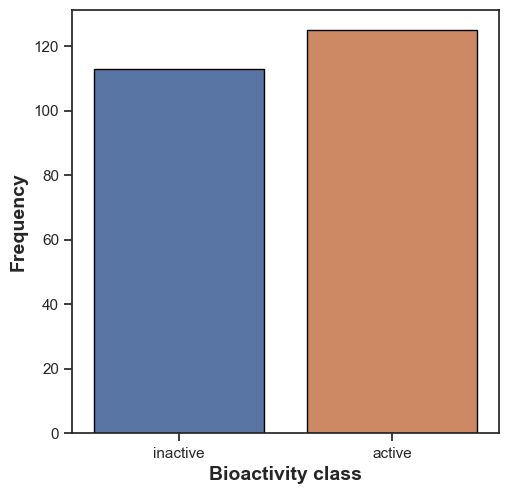

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

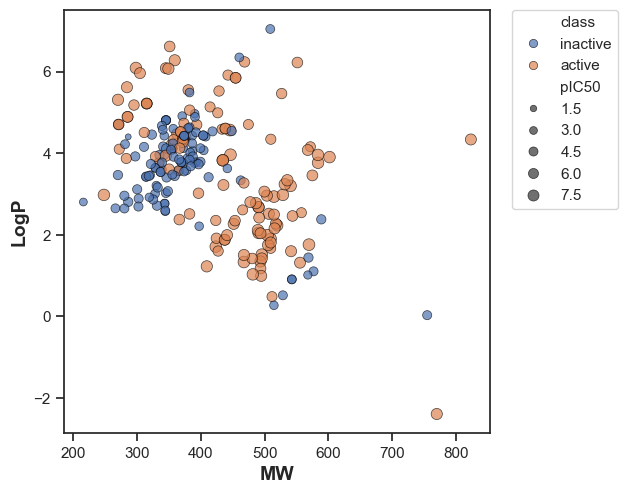

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

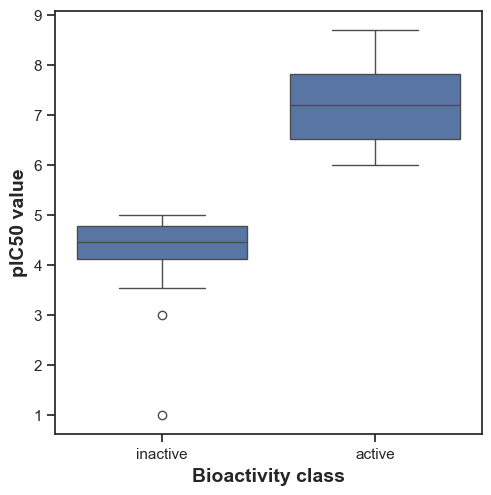

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [36]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [37]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,14125.0,1.746962e-40,0.05,Different distribution (reject H0)


#### **MW**

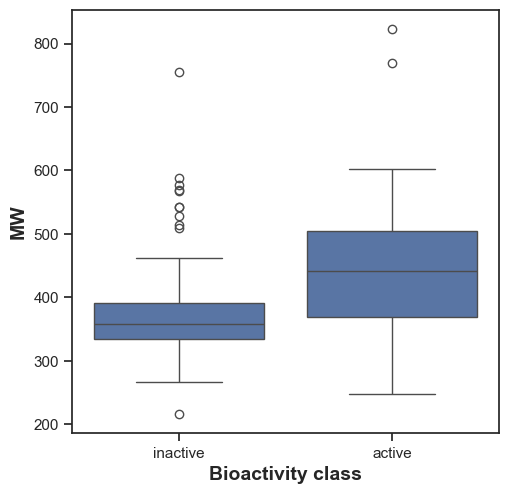

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1058779.0,2.072256e-57,0.05,Different distribution (reject H0)


#### **LogP**

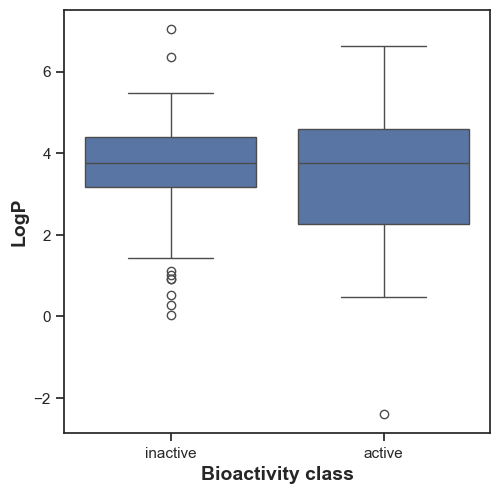

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [41]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6775.5,0.589084,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

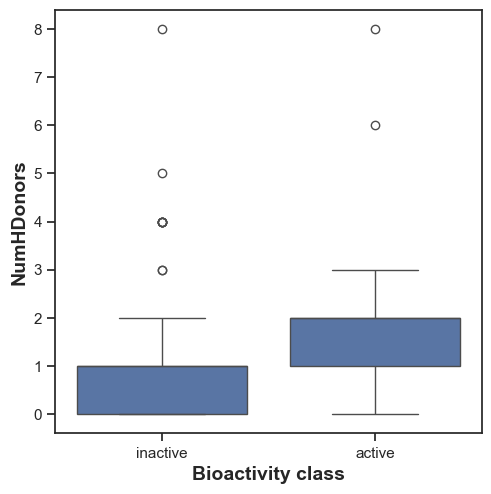

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,10602.5,2.594043e-12,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

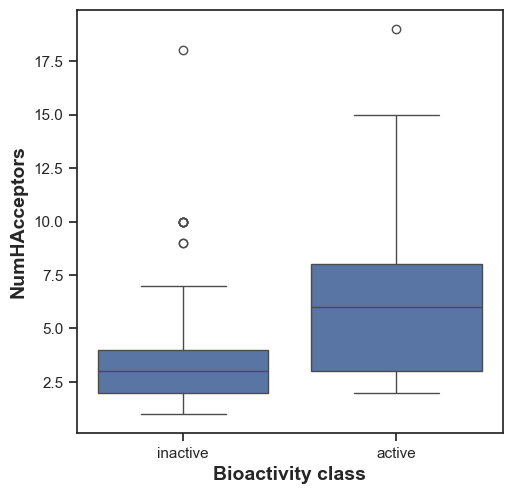

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [45]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,9526.0,0.000002,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [47]:
import zipfile
import glob

with zipfile.ZipFile('results.zip', 'w') as zipf:
    for file in glob.glob('*.csv'):
        zipf.write(file)
    for file in glob.glob('*.pdf'):
        zipf.write(file)